In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import utlis_Angepasst


In [13]:
cap = cv2.VideoCapture(0)
cap.set(10,160)
cap.set(3,1920) #width
cap.set(4,1080) #hight
#Skalierungsfaktor sonst wäre das Bild nur 210*297
scale = 3
wP = 210 *scale
hP= 297 *scale

#Bild einlesen:
img = cv2.imread("F:\\Projektseminar\\Edge Detection\\Test.jpg") #F:/Projektseminar/Baustellenbilder/Wand1_6.jpg
i=1
if i<2:  #while True: 
    imgContours , conts = utlis_Angepasst.getContours(img,minArea=10,filter=4, showCanny=False) #Filter 4 weil nur nach 4eckigen Objekten gesucht wird minArea=50000
    if len(conts) != 0:
        biggest = conts[0][2]
        #print(biggest)
        imgWarp = utlis_Angepasst.warpImg(img, biggest, wP,hP)
        imgContours2, conts2 = utlis_Angepasst.getContours(imgWarp,
                                                 minArea=2000, filter=4,
                                                 cThr=[50,50],draw = False)
        if len(conts) != 0:
            for obj in conts2:
                cv2.polylines(imgContours2,[obj[2]],True,(0,255,0),2)
                nPoints = utlis_Angepasst.reorder(obj[2])
                nW = round((utlis_Angepasst.findDis(nPoints[0][0]//scale,nPoints[1][0]//scale)/10),1)
                nH = round((utlis_Angepasst.findDis(nPoints[0][0]//scale,nPoints[2][0]//scale)/10),1)
                cv2.arrowedLine(imgContours2, (nPoints[0][0][0], nPoints[0][0][1]), (nPoints[1][0][0], nPoints[1][0][1]),
                                (255, 0, 255), 3, 8, 0, 0.05)
                cv2.arrowedLine(imgContours2, (nPoints[0][0][0], nPoints[0][0][1]), (nPoints[2][0][0], nPoints[2][0][1]),
                                (255, 0, 255), 3, 8, 0, 0.05)
                x, y, w, h = obj[3]
                cv2.putText(imgContours2, '{}cm'.format(nW), (x + 30, y - 10), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1.5,
                            (255, 0, 255), 2)
                cv2.putText(imgContours2, '{}cm'.format(nH), (x - 70, y + h // 2), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1.5,
                            (255, 0, 255), 2)
        cv2.imwrite("F:\\Projektseminar\\Edge Detection\\Resultat1.jpg", imgContours2)
        #cv2.imshow('A4', imgContours2)
 
    #img = cv2.resize(img,(0,0),None,0.5,0.5) #error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4058: error: (-215:Assertion failed) !dsize.empty() in function 'cv::resize'
    #cv2.imshow('Original',img)
    cv2.waitKey(1)
    i=i+1

i ist [[[ 945 1845]]

 [[ 945 1848]]

 [[ 949 1848]]

 [[ 949 1845]]]
i ist [[[1168 1844]]

 [[1168 1848]]

 [[1174 1848]]

 [[1174 1846]]

 [[1172 1844]]]
i ist [[[ 857 1844]]

 [[ 857 1848]]

 [[ 861 1848]]

 [[ 861 1844]]]
i ist [[[ 703 1844]]

 [[ 703 1848]]

 [[ 708 1848]]

 [[ 708 1844]]]
i ist [[[ 591 1843]]

 [[ 591 1848]]

 [[ 600 1848]]

 [[ 600 1845]]

 [[ 598 1843]]]
i ist [[[ 455 1843]]

 [[ 455 1848]]

 [[ 463 1848]]

 [[ 463 1845]]

 [[ 462 1844]]

 [[ 461 1844]]

 [[ 460 1843]]]
i ist [[[ 275 1843]]

 [[ 275 1848]]

 [[ 279 1848]]

 [[ 279 1843]]]
i ist [[[1082 1842]]

 [[1082 1848]]

 [[1086 1848]]

 [[1086 1842]]]
i ist [[[ 993 1841]]

 [[ 992 1842]]

 [[ 991 1842]]

 [[ 991 1848]]

 [[1013 1848]]

 [[1013 1841]]

 [[1008 1841]]

 [[1008 1842]]

 [[1007 1843]]

 [[ 999 1843]]

 [[ 998 1842]]

 [[ 998 1841]]]
i ist [[[1381 1839]]

 [[1381 1848]]

 [[1386 1848]]

 [[1386 1839]]]
i ist [[[1242 1839]]

 [[1242 1843]]

 [[1243 1844]]

 [[1243 1848]]

 [[1248 1848]]

 [[124

In [ ]:
#Bild Warpen:
#https://towardsdatascience.com/image-processing-with-python-applying-homography-for-image-warping-84cd87d2108f
#Statt der festgelegten Punkte im Bild müssen wir die Eckpunkte im Aruco Sticker benutzen!
#Wahrscheinlich besser: https://www.youtube.com/watch?v=dpjhGobnCxU

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
from skimage import transform
from skimage.io import imread, imshow
import cv2

img =cv2.imread("F:\\Projektseminar\\Edge Detection\\Test.jpg")

(array([[[413., 465.],
        [908., 465.],
        [908., 954.],
        [413., 954.]]], dtype=float32),)
Länge Arucosticker in Pixel 1968.0
Ratio Pixel to cm 49.2


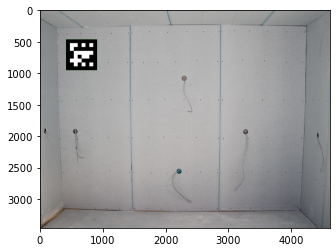

In [33]:
#Aruco Marker einbinden https://www.youtube.com/watch?v=v5a7pKSOJd8&t=2153s
import cv2.aruco as aruco

#Umfang des Aruco Stickers:
Umfang=40

def findArucoMarkers(img, markerSize=6, totalMarkers=250, draw=True):
  imgGray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  key=getattr(aruco,f'DICT_{markerSize}X{markerSize}_{totalMarkers}') #getattr holt die Attribute aus Methode oben und legt sie ins Dict
  arucoDict=aruco.Dictionary_get(key)
  arucoParam=aruco.DetectorParameters_create()
  bboxs, ids, rejected = aruco.detectMarkers(imgGray, arucoDict, parameters=arucoParam) # bboxs: Array mit den Koordinaten des Arucostickers
  #print(ids)
  if draw:
      aruco.drawDetectedMarkers(img, bboxs) # int_corners=np.int0(bboxs) ; cv2.polylines(img, [int_corners], True, (0,255,0), 5) individueller funktioniert aber nicht
  print(bboxs)
  aruco_perimeter= cv2.arcLength(bboxs[0], True) #das hier nach unten muss später in die andere Methode (getSize)
  print("Länge Arucosticker in Pixel", aruco_perimeter)
  pixel_cm_ratio=aruco_perimeter/Umfang #Warum existiert die Variable hier angeblich nicht? Frage für morgen https://youtu.be/lbgl2u6KrDU?t=2107
  print("Ratio Pixel to cm", pixel_cm_ratio)
  object_width=w/pixel_cm_ratio
  object_hight=h/pixel_cm_ratio

#def getSize ()
  #Herausfinden wie man korrekt Funktionen schreibt für mehr Ordnung
  #aruco_perimeter= cv2.arcLength(bboxs[0], True)
  #print("Länge Arucosticker in Pixel", aruco_perimeter) 

i=1
if i<2:
  img =cv2.imread("F:\\Projektseminar\\Edge Detection\\Aruco_Test.jpg")
  findArucoMarkers(img)
  #dann Warpen
  #Pixel to cm:
  #pixel_cm_ratio=aruco_perimeter/Umfang #Warum existiert die Variable hier angeblich nicht? Frage für morgen https://youtu.be/lbgl2u6KrDU?t=2107
  #print(pixel_cm_ratio)
  plt.imshow(img)
  cv2.waitKey(1)
  cv2.imwrite("F:\\Projektseminar\\Edge Detection\\Aruco_Test_Resultat.jpg", img)
  i=i+1
